<a href="https://colab.research.google.com/github/Mbetini/Hello/blob/main/studio%20week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code for CIS7031, Dr Ambikesh Jayal, ajayal@cardiffmet.ac.uk

In [ ]:
#COMMON IMPORTS

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
from numpy import asarray
from sklearn.datasets import make_regression

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pandas import read_csv
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
    
def get_nn_simplemodel(n_inputs=5, n_outputs=1):
    # create model
    model = Sequential()
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(2000, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
#function to return data as X, Y

def getDataBoston():
    # load dataset
    #df = read_csv("boston_housing.csv", delim_whitespace=True, header=None)
    
    #df = pd.read_csv("BostonHousingData/boston_housing_csv.csv")

    url="https://raw.githubusercontent.com/ambi1999/mldataset/main/boston_housing_csv.csv"
    df=pd.read_csv(url)
    
    #DATA CLEANING STEP
    # dropna drops missing values (think of na as "not available")
    df = df.dropna(axis=0)
   
    #Select only numeric columns
    df_onlyNumeric=df.select_dtypes(include=np.number)
    
    df=df_onlyNumeric
    
    #dataset = df.values
    X = df.iloc[:, 0:13]
    y=df.iloc[:, 13:14]

    return X,y,df

In [ ]:
#This function returns X,y,dataframe
def getData():
    return getDataBoston();

In [ ]:
#Test getData function

X,y,df=getData();

#print(X.head())
#print(y.head())
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MDEV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ab92d4710>]],
      dtype=object)

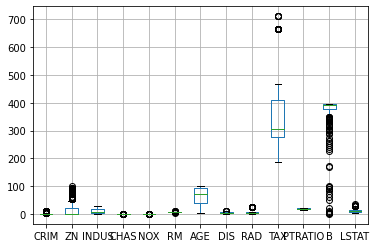

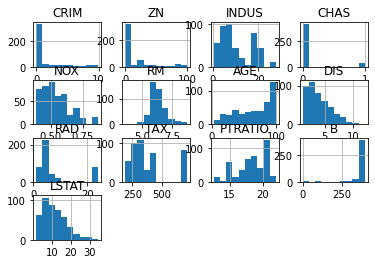

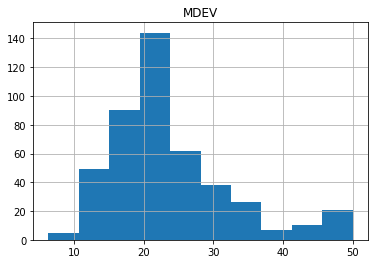

In [ ]:
#Data Exploration

X,y,df=getData();

X.boxplot()
X.hist()


y.boxplot()
y.hist()



In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


#train is 85, test is 15, val is 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)


#train is 80, test is 10, val is 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

print("X.shape:", X.shape)
print("X_train.shape", X_train.shape)
print("X_val.shape: ", X_val.shape)
print("X_test.shape: ", X_test.shape)


X.shape: (452, 13)
X_train.shape (365, 13)
X_val.shape:  (41, 13)
X_test.shape:  (46, 13)


In [ ]:
# Explore train vs validation error for different epochs
network=get_nn_simplemodel(len(X.columns),1);
history = network.fit(X_train, y_train, verbose=0, epochs=20, batch_size=4, validation_data=(X_val, y_val))


In [ ]:

predicted_train=network.predict(X_train);
predicted_val=network.predict(X_val);
predicted_test=network.predict(X_test);

#print(predicted_train)
#print(predicted_val)
#print(predicted_test)

#y_train=y_train.flatten();
#y_val=y_val.flatten();
#y_test=y_test.flatten();

#y_train=y_train.to_numpy().flatten();
#y_val=y_val.to_numpy().flatten();
#y_test=y_test.to_numpy().flatten();

predicted_train=predicted_train.flatten()
predicted_val=predicted_val.flatten()
predicted_test=predicted_test.flatten()


timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");

#Write to file

df = pd.DataFrame({'y_train':y_train, 'predicted_train':predicted_train})
#df.to_excel("train_error"+timeStr+".xlsx", sheet_name='Sheet_name_1')
df.to_csv("train_error"+timeStr+".csv")

df = pd.DataFrame({'y_val':y_val, 'predicted_val':predicted_val})
#df.to_excel("val_error"+timeStr+".xlsx", sheet_name='Sheet_name_1')
df.to_csv("val_error"+timeStr+".csv")

df = pd.DataFrame({'y_test':y_test, 'predicted_test':predicted_test})
#df.to_excel("test_error"+timeStr+".xlsx", sheet_name='Sheet_name_1')
df.to_csv("test_error"+timeStr+".csv")



ValueError: ignored